In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/kaggle/input/car-insurance-data/Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

# Checking Missing Values

<Axes: >

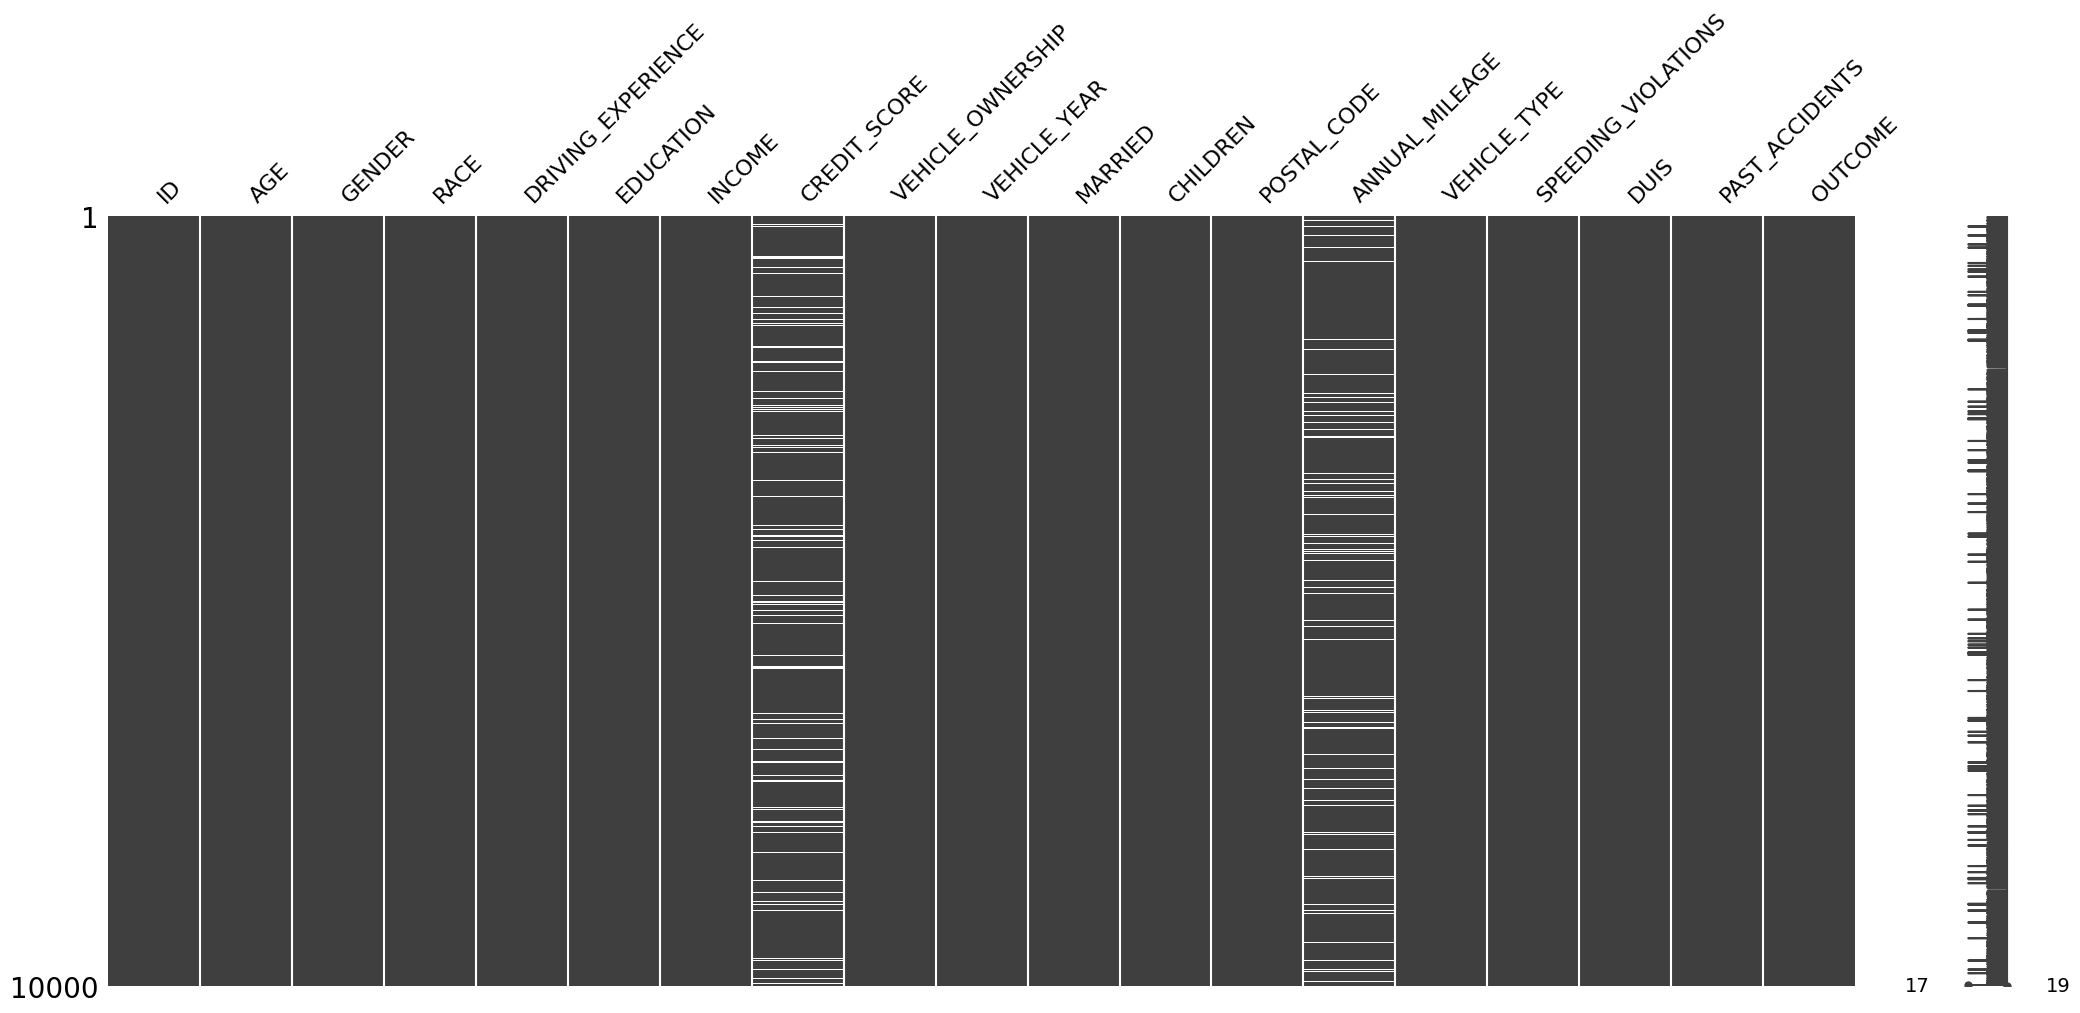

In [18]:
import missingno as msno
msno.matrix(df)

In [19]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [20]:
print(df['AGE'].value_counts(),'\n')
print(df['DRIVING_EXPERIENCE'].value_counts())

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64 

DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64


# Data Cleaning

In [21]:
from sklearn.preprocessing import LabelEncoder

# 1. Handling Missing Values (Imputation)
# Using Median for numerical values to avoid being skewed by outliers
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median())
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

# 2. Dropping Unnecessary Columns
# ID and Postal Code don't provide predictive power for a general model
df_cleaned = df.drop(columns=['ID', 'POSTAL_CODE'])

# 3. Ordinal Encoding (Preserving the natural order)
# This is where your "Math" background shines - knowing that 'poverty' is lower than 'upper class'
age_map = {'16-25': 0, '26-39': 1, '40-64': 2, '65+': 3}
exp_map = {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3}
edu_map = {'none': 0, 'high school': 1, 'university': 2}
inc_map = {'poverty': 0, 'working class': 1, 'middle class': 2, 'upper class': 3}

df_cleaned['AGE'] = df_cleaned['AGE'].map(age_map)
df_cleaned['DRIVING_EXPERIENCE'] = df_cleaned['DRIVING_EXPERIENCE'].map(exp_map)
df_cleaned['EDUCATION'] = df_cleaned['EDUCATION'].map(edu_map)
df_cleaned['INCOME'] = df_cleaned['INCOME'].map(inc_map)

# 4. Nominal Encoding (Converting categorical to binary/numeric)
# For binary categories, simple map is fine. For more than 2, get_dummies is better.
df_cleaned['GENDER'] = df_cleaned['GENDER'].map({'female': 0, 'male': 1})
df_cleaned['VEHICLE_YEAR'] = df_cleaned['VEHICLE_YEAR'].map({'before 2015': 0, 'after 2015': 1})
df_cleaned['VEHICLE_TYPE'] = df_cleaned['VEHICLE_TYPE'].map({'sedan': 0, 'sports car': 1})

# RACE has 2 categories: majority, minority. Simple map.
df_cleaned['RACE'] = df_cleaned['RACE'].map({'minority': 0, 'majority': 1})

# Check the results
print("First 5 rows of Cleaned Data:")
print(df_cleaned.head())
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())


First 5 rows of Cleaned Data:
   AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    3       0     1                   0          1       3      0.629027   
1    0       1     1                   0          0       0      0.357757   
2    0       0     1                   0          1       1      0.493146   
3    0       1     1                   0          2       1      0.206013   
4    1       1     1                   1          0       1      0.388366   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  ANNUAL_MILEAGE  \
0                1.0             1      0.0       1.0         12000.0   
1                0.0             0      0.0       0.0         16000.0   
2                1.0             0      0.0       0.0         11000.0   
3                1.0             0      0.0       1.0         11000.0   
4                1.0             0      0.0       0.0         12000.0   

   VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  OUTCOME 

# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

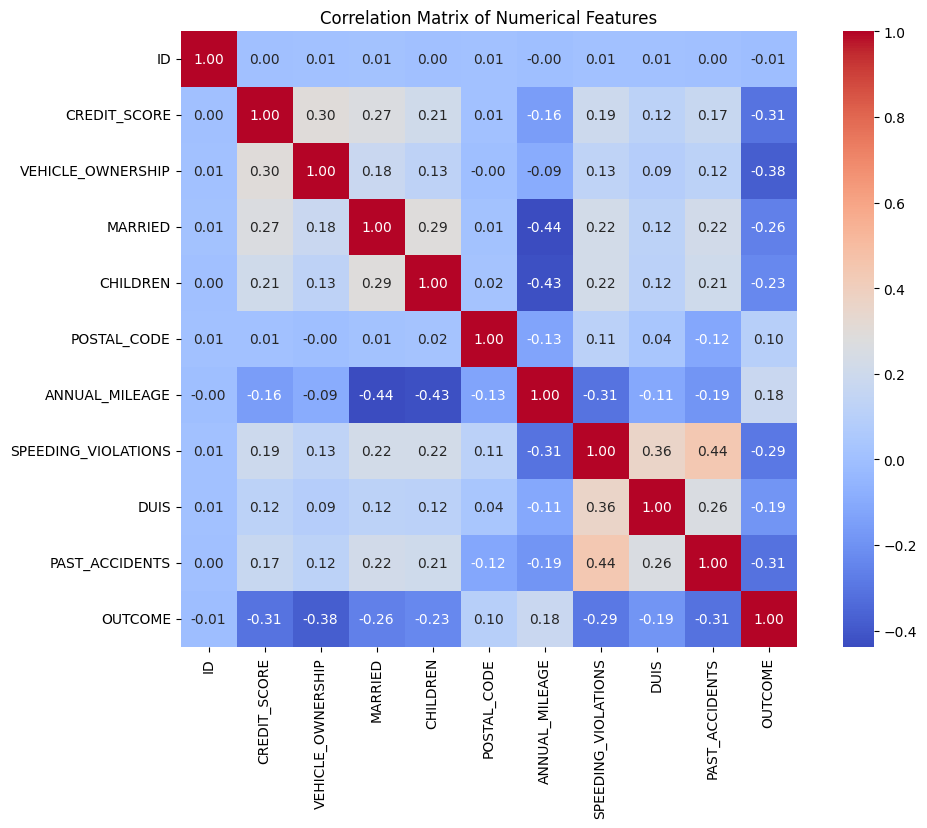

In [22]:
# Correlation Analysis
df_corr = df.corr
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr(numeric_only=True),annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')

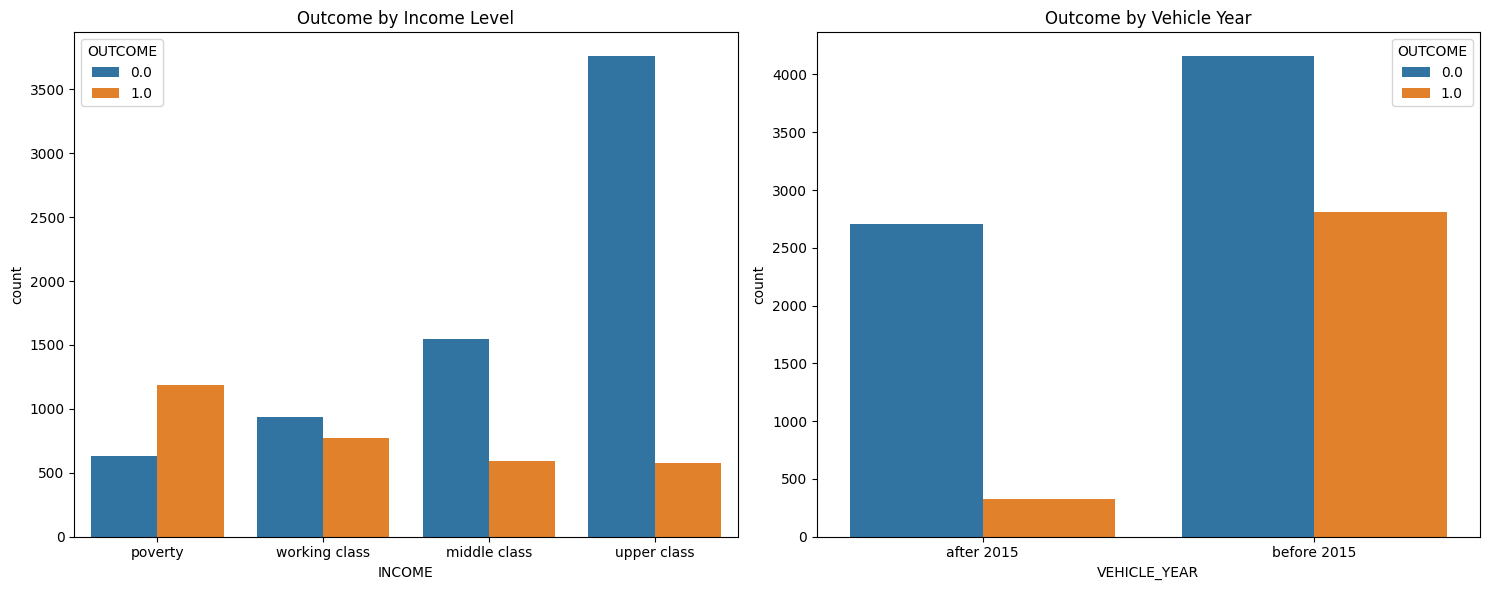

In [23]:
#Categorical Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='INCOME', hue='OUTCOME', ax=axes[0], order=['poverty', 'working class', 'middle class', 'upper class'])
axes[0].set_title('Outcome by Income Level')

sns.countplot(data=df, x='VEHICLE_YEAR', hue='OUTCOME', ax=axes[1])
axes[1].set_title('Outcome by Vehicle Year')

plt.tight_layout()

# Age and Driving Experience 

Text(0.5, 1.0, 'Insurance Outcome by Driving Experience')

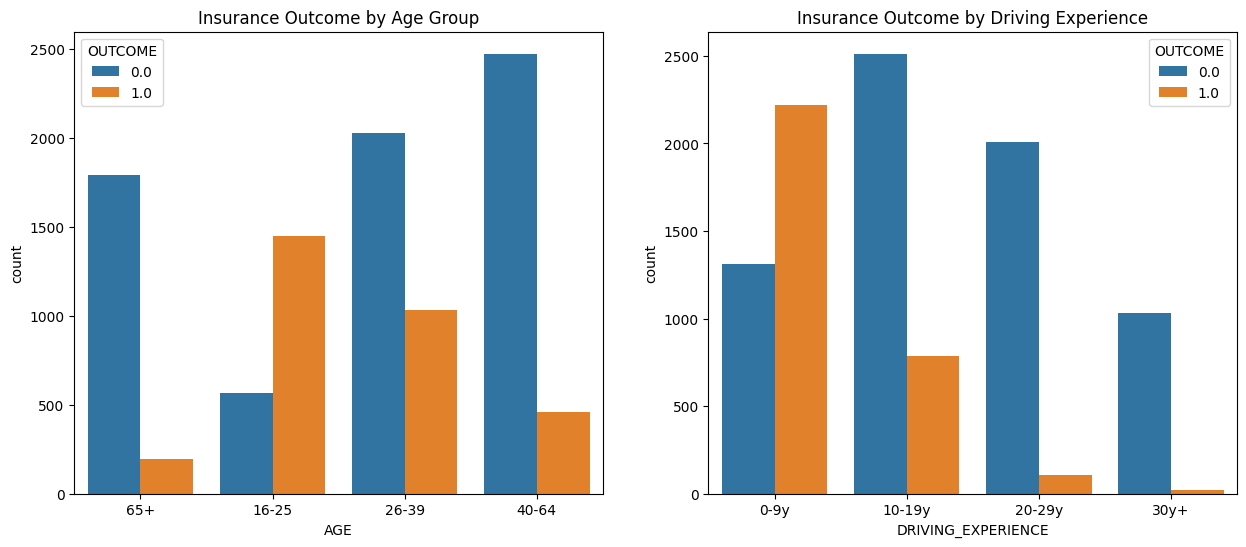

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='AGE',hue='OUTCOME',data=df,)
plt.title('Insurance Outcome by Age Group')

plt.subplot(1,2,2)
sns.countplot(data=df, x='DRIVING_EXPERIENCE', hue='OUTCOME', order=['0-9y', '10-19y', '20-29y', '30y+'])
plt.title('Insurance Outcome by Driving Experience')

In [25]:
# 4. Statistical Summary for Credit Score
credit_summary = df.groupby('OUTCOME')['CREDIT_SCORE'].describe()
print("Credit Score Statistics by Outcome:")
credit_summary

Credit Score Statistics by Outcome:


,count,mean,std,min,25%,50%,75%,max
OUTCOME,,,,,,,,
0.0,6867.0,0.544013,0.122432,0.064810,0.475847,0.541306,0.628592,0.960819
1.0,3133.0,0.456893,0.128570,0.053358,0.363658,0.460779,0.530345,0.857357


In [26]:
# 5. Statistical Summary for Annual Mileage
mileage_summary = df.groupby('OUTCOME')['ANNUAL_MILEAGE'].describe()
print("\nAnnual Mileage Statistics by Outcome:")
mileage_summary


Annual Mileage Statistics by Outcome:


,count,mean,std,min,25%,50%,75%,max
OUTCOME,,,,,,,,
0.0,6867.0,11403.524101,2586.934016,2000.0,10000.0,12000.0,13000.0,20000.0
1.0,3133.0,12432.812001,2749.498208,3000.0,11000.0,12000.0,14000.0,22000.0


# Evaluation and Build Model
## We use Logistic Regression and Random Forest
## Because we want to compare a statistical modeling and Tree Based model

In [27]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

#1.Split data
X = df_cleaned.drop('OUTCOME',axis=1)
y = df_cleaned['OUTCOME']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

#2. Model 1: Logistic Regression
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

#3. Model 2 : Random forest with randomized
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators':[100,300,500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions = param_dist,
    n_iter = 10, random_state = 42,
    n_jobs = 1, scoring='f1'
)

rf_random.fit(X_train,y_train)
best_rf = rf_random.best_estimator_
y_pred_rf_random = best_rf.predict(X_test)
y_prob_rf = rf_random.predict_proba(X_test)[:, 1]

# --- EVALUATION ---

In [28]:
print("--- Best Hyperparameters (Random Forest) ---")
print(rf_random.best_params_)

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))
print(f"Logistic ROC-AUC: {roc_auc_score(y_test, y_prob_log):.4f}")

print("\n--- Random Forest (Tuned) Report ---")
print(classification_report(y_test, y_pred_rf_random))
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

--- Best Hyperparameters (Random Forest) ---
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}

--- Logistic Regression Report ---
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1367
         1.0       0.78      0.70      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000

Logistic ROC-AUC: 0.8954

--- Random Forest (Tuned) Report ---
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1367
         1.0       0.76      0.69      0.73       633

    accuracy                           0.83      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.83      0.83      0.83      2000

Random Forest ROC-AUC: 0.8933


# --- VISUALIZATION ---

/tmp/ipykernel_55/3313630847.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


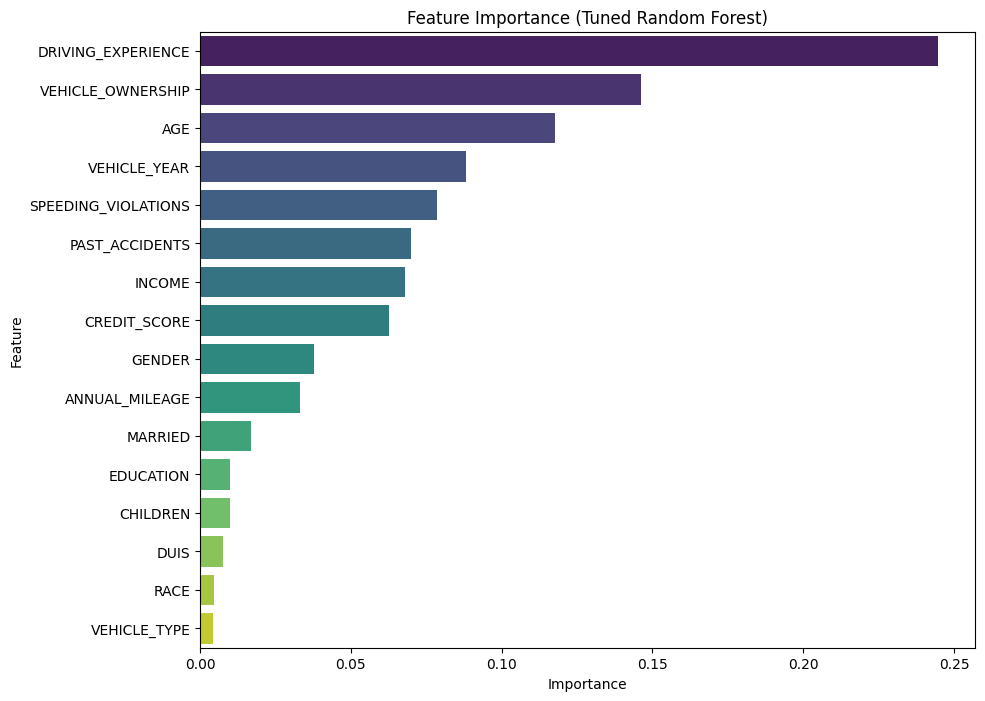

In [34]:
# 1. Feature Importance (Random Forest)
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Tuned Random Forest)')
plt.savefig('rf_feature_importance_tuned.png')

feature_importance_df.to_csv('feature_importance.csv', index=False)



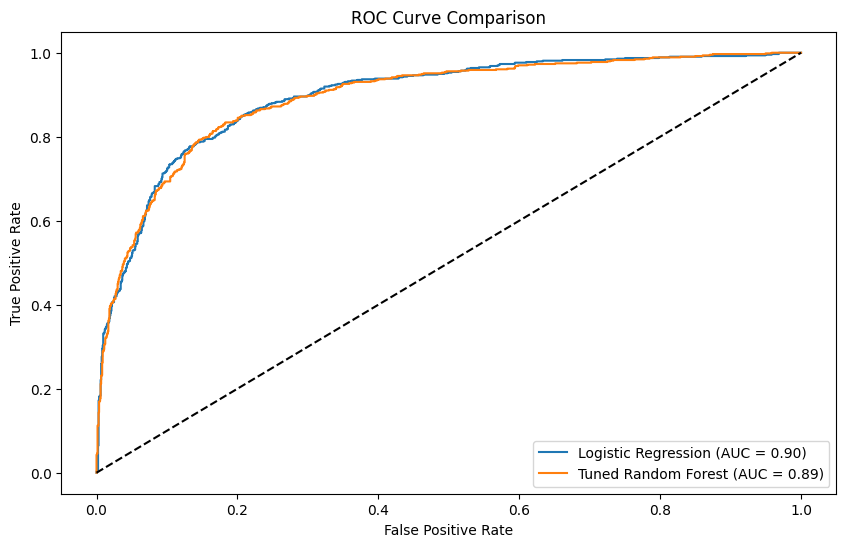

In [30]:
# 2. ROC Curve Plot
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Tuned Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.savefig('roc_curve_tuned.png')

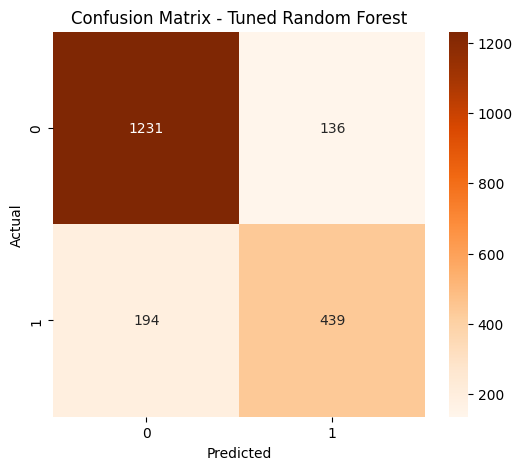

In [31]:
# 3. Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf_random)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.savefig('confusion_matrix_rf_tuned.png')

# Prepare Data for Dashboard

In [32]:
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,12000.0,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [33]:
df_viz = df.copy()

df_viz['VEHICLE_OWNERSHIP'] = df_viz['VEHICLE_OWNERSHIP'].apply(lambda x: 'Owned' if x == 1 else 'Unowned')
df_viz['MARRIED'] = df_viz['MARRIED'].apply(lambda x: 'Married' if x == 1 else 'Single')
df_viz['CHILDREN'] = df_viz['CHILDREN'].apply(lambda x: 'Yes' if x == 1 else 'No')

df_viz.to_csv('PowerBI_visualize',index=False)

